<a href="https://colab.research.google.com/github/Emzzy123/Customer_Churn_Capstone_Project/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 **PROBLEM DEFINITION**

The problem we aim to address through data mining is customer churn prediction for ConnectTel Telecom Company. Customer churn refers to the phenomenon where customers discontinue their services with the company, which poses a significant threat to business sustainability and growth.

By developing a robust customer churn prediction system, ConnectTel can benefit in several ways:

Retention Strategy Improvement: The predictive model will help ConnectTel identify customers who are at risk of churning. Armed with this information, the company can tailor retention strategies and interventions to prevent churn proactively. For example, targeted promotional offers, personalized communication, or service upgrades can be offered to retain valuable customers.
Resource Optimization: Predicting customer churn allows ConnectTel to allocate resources more efficiently. Instead of employing blanket retention efforts for all customers, the company can focus its resources on high-risk customers, thereby maximizing the effectiveness of its retention initiatives and minimizing costs.
Enhanced Customer Experience: By understanding the factors contributing to churn, ConnectTel can improve its overall service quality and customer experience. Addressing pain points identified through churn prediction can lead to higher customer satisfaction and loyalty, ultimately reducing the likelihood of churn.
Competitive Advantage: In the highly competitive telecommunications industry, the ability to anticipate and prevent customer churn can be a significant competitive advantage. By retaining more customers and fostering long-term relationships, ConnectTel can solidify its market position and differentiate itself from competitors.



2. **PERFORM EXPLORATORY DATA ANALYSIS IN PYTHON**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
df =  pd.read_csv("Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [6]:
df.describe(include = "object").T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [7]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
# calculate median value of TotalCharges
TotalCharges_median = df['TotalCharges'].median()
#fill nan with median
df['TotalCharges'] = df['TotalCharges'].fillna(TotalCharges_median)

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

a) Visualize relationships between the label and some key features

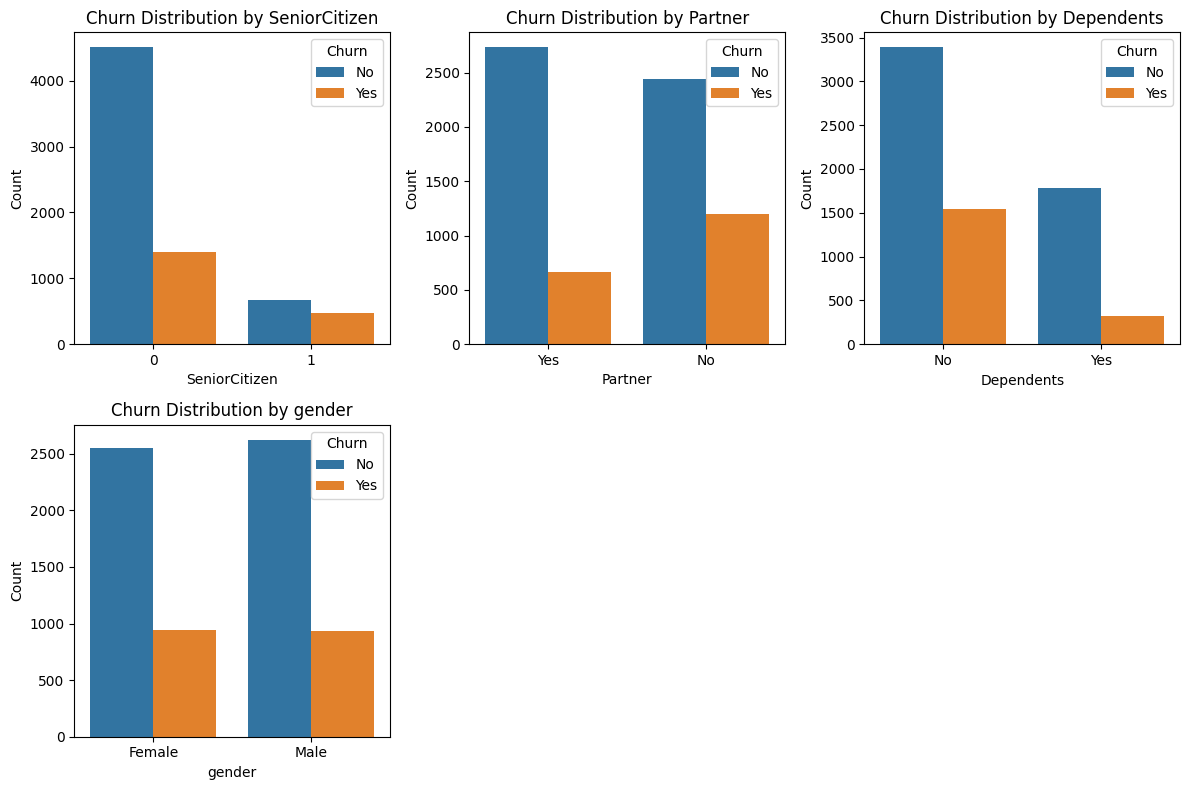

In [10]:
# Selecting key features for visualization
key_features = ['SeniorCitizen', 'Partner', 'Dependents', 'gender']

# Visualizing key features using bar plots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'Churn Distribution by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Churn', loc='upper right')

plt.tight_layout()
plt.show();

<Figure size 800x600 with 0 Axes>

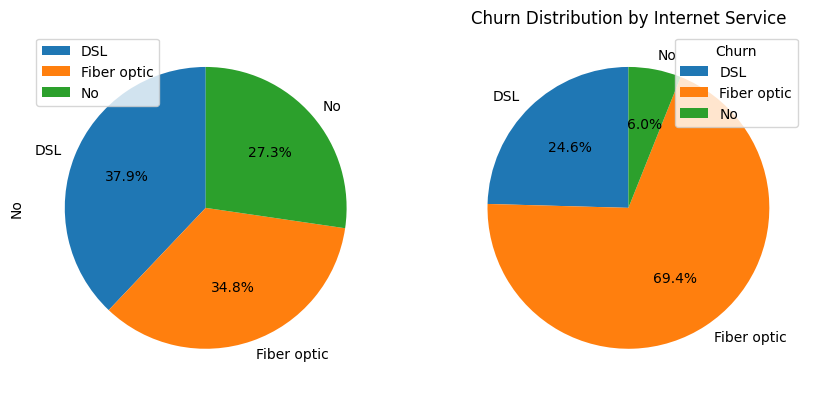

In [11]:
# Visualizing churn distribution with pie chart for InternetService
plt.figure(figsize=(8, 6))
internet_churn = df.groupby('InternetService')['Churn'].value_counts().unstack()
internet_churn.plot(kind='pie', subplots=True, autopct='%1.1f%%', startangle=90, figsize=(10, 7))
plt.title('Churn Distribution by Internet Service')
plt.ylabel('')
plt.legend(title='Churn', loc='upper right')
plt.show();

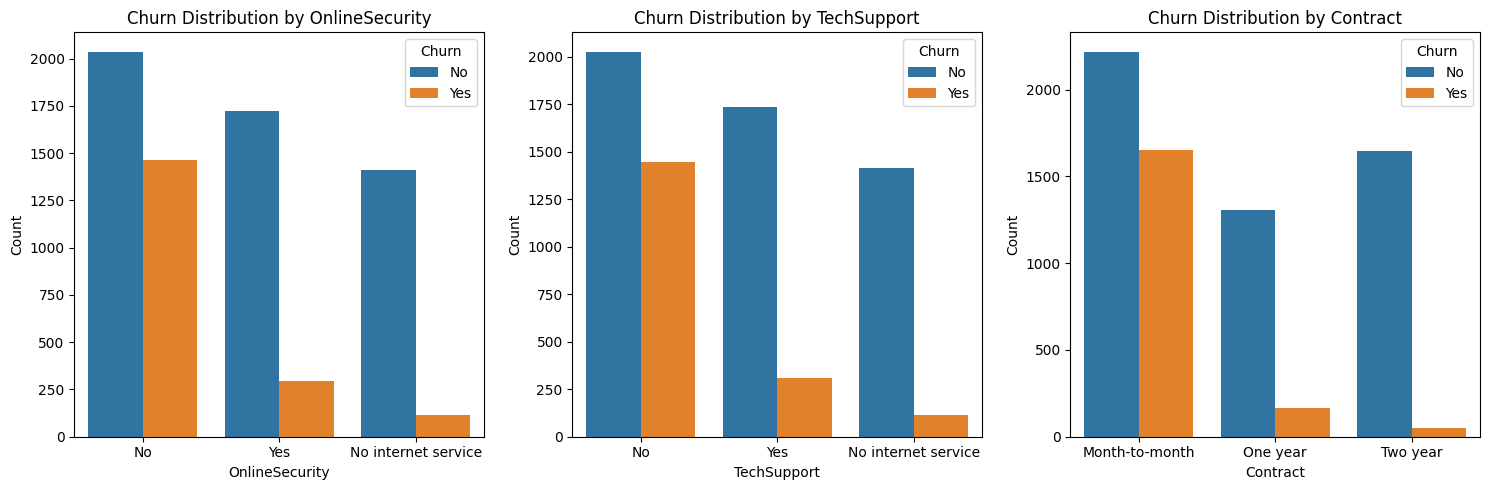

In [12]:
# Additional key features for visualization
additional_features = ['OnlineSecurity', 'TechSupport', 'Contract']

# Visualizing additional key features using bar plots
plt.figure(figsize=(15, 5))
for i, feature in enumerate(additional_features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'Churn Distribution by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Churn', loc='upper right')

plt.tight_layout()
plt.show();

<Figure size 800x600 with 0 Axes>

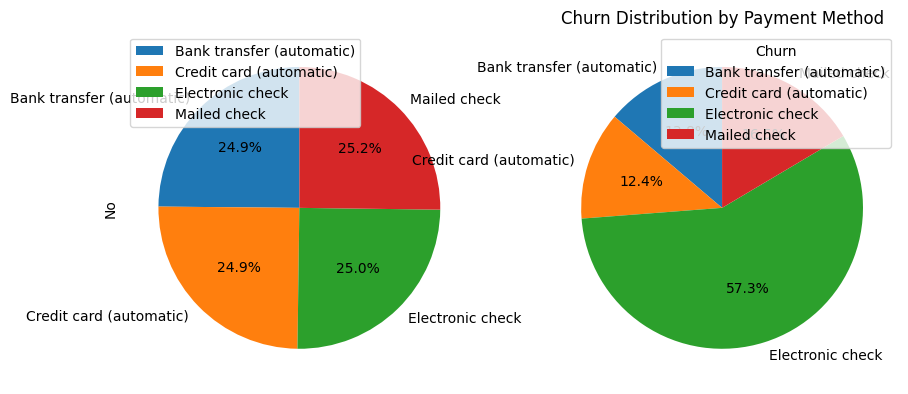

In [13]:
# Visualizing churn distribution with pie chart for PaymentMethod
plt.figure(figsize=(8, 6))
payment_churn = df.groupby('PaymentMethod')['Churn'].value_counts().unstack()
payment_churn.plot(kind='pie', subplots=True, autopct='%1.1f%%', startangle=90, figsize=(10, 7))
plt.title('Churn Distribution by Payment Method')
plt.ylabel('')
plt.legend(title='Churn', loc='upper right')
plt.show();

b) Explore correlations

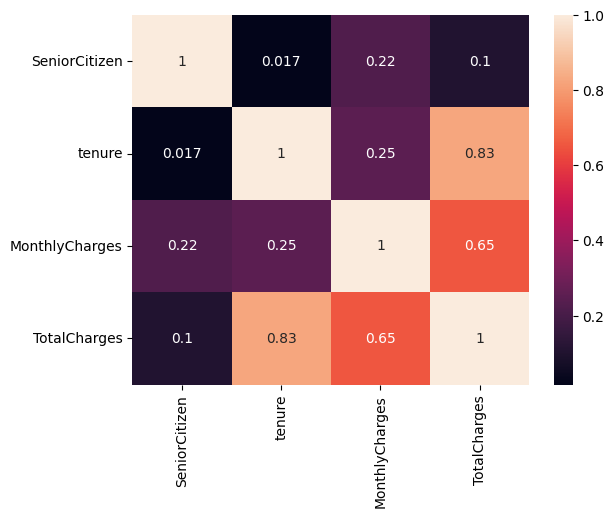

In [14]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])  # Selecting only numeric columns
correlation_matrix = numeric_df.corr()  # Calculating correlation matrix
sns.heatmap(correlation_matrix, annot=True)
plt.show();

c) Conduct univariate, bivariate, and multivariate analysis as much as is feasible

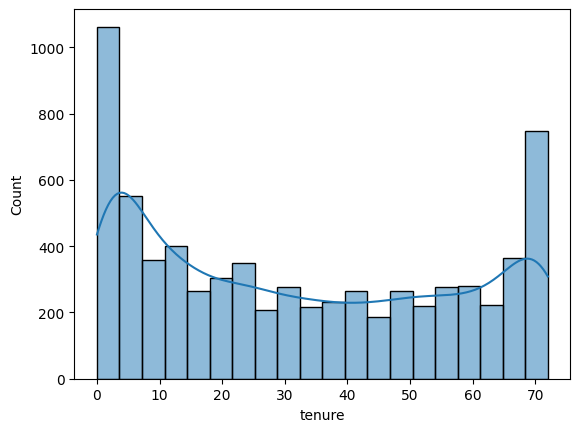

In [15]:
# Univariate analysis
sns.histplot(df['tenure'], bins=20, kde=True)
plt.show();

In [16]:
print(df['tenure'].skew())
print(df['tenure'].kurtosis())

0.2395397495619829
-1.387371635971685


Overall, the 'tenure' variable has a slightly right-skewed distribution with  slightly flatter shape than a normal distribution.

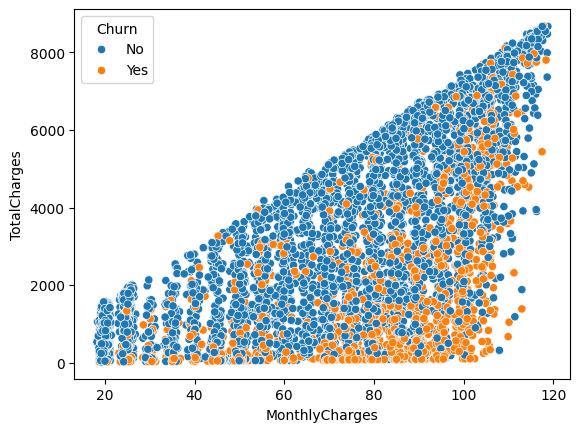

In [17]:
# Bivariate analysis
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df)
plt.show()

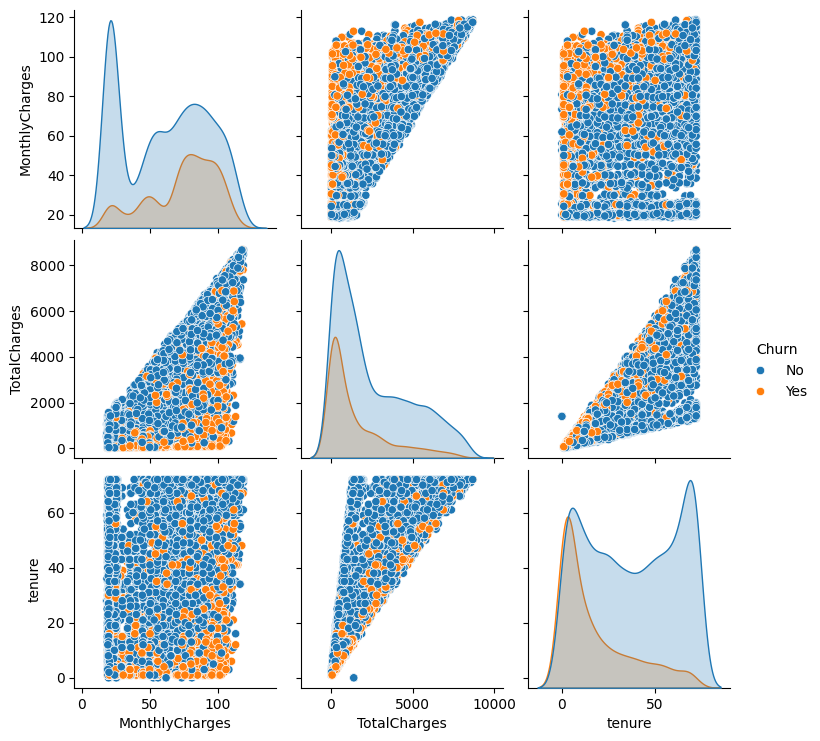

In [18]:
# Multivariate analysis
sns.pairplot(df[['MonthlyCharges', 'TotalCharges', 'tenure', 'Churn']], hue='Churn')
plt.show()

3. **PERFORM FEATURE ENGINEERING**

In [19]:
df1 = df.copy()
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.000,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.000,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.350,89.85,118.75
TotalCharges,7043.0,2281.916928,2265.270398,18.80,402.225,1397.475,3786.60,8684.80


a. encoding categorical variable

** ENCODED IN MODEL TRAINING**

b. Create new features from existing features where necessary, depending on insights from your EDA

In [21]:
#b) Create new features from existing features where necessary, depending on insights from your EDA
# One-hot encode categorical variables
df = pd.get_dummies(df1[['PhoneService', 'InternetService', 'StreamingTV', 'StreamingMovies']])

# Total Services
df['TotalServices'] = df.sum(axis=1)

# Total Charges per Service
df['TotalChargesPerService'] = df1['MonthlyCharges'] * df1['tenure']

# Tech Support and Online Security Bundle
df['TechSecurityBundle'] = (df1['TechSupport'] == 'Yes') & (df1['OnlineSecurity'] == 'Yes')
df['TechSecurityBundle'] = df['TechSecurityBundle'].astype(int)

# Tenure Group
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['1 year', '2 years', '3 years', '4 years', '5 years', '6 years+']
df['TenureGroup'] = pd.cut(df1['tenure'], bins=bins, labels=labels)

# Average Monthly Charges
df['AverageMonthlyCharges'] = df1['TotalCharges'] / df1['tenure']


In [22]:
# Display the updated DataFrame with new features
df.head()

,PhoneService_No,PhoneService_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,TotalServices,TotalChargesPerService,TechSecurityBundle,TenureGroup,AverageMonthlyCharges
0,True,False,True,False,False,True,False,False,True,False,False,4,29.85,0,1 year,29.850000
1,False,True,True,False,False,True,False,False,True,False,False,4,1936.30,0,3 years,55.573529
2,False,True,True,False,False,True,False,False,True,False,False,4,107.70,0,1 year,54.075000
3,True,False,True,False,False,True,False,False,True,False,False,4,1903.50,1,4 years,40.905556
4,False,True,False,True,False,True,False,False,True,False,False,4,141.40,0,1 year,75.825000


In [23]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


4. **MODEL SELECTION, TRAINING, AND VALIDATION**

a.Train and test at least 3 supervised learning model

In [25]:
# Assuming df1 is your original DataFrame which was copied from df using df1 = df.copy()
# List of categorical columns
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod']

# One-hot encoding for categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_cols = encoder.fit_transform(df1[categorical_cols])
encoded_feature_names = encoder.get_feature_names_out(input_features=categorical_cols)
encoded_df = pd.DataFrame(encoded_cols, columns=encoded_feature_names)
df_encoded = pd.concat([df1.drop(columns=categorical_cols), encoded_df], axis=1)

# Splitting the data into features (X) and target variable (y)
X = df_encoded.drop(columns=['Churn', 'customerID'])  # Features
y = df_encoded['Churn']  # Target variable

# Splitting the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training and testing Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print(lr_pred)
print("----------")
# Training and testing Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print(lr_pred)
print("----------")
# Training and testing Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print(lr_pred)
print("----------")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


['Yes' 'No' 'No' ... 'No' 'No' 'Yes']
----------
['Yes' 'No' 'No' ... 'No' 'No' 'Yes']
----------
['Yes' 'No' 'No' ... 'No' 'No' 'Yes']
----------


In [26]:
# Model evaluation
#) Analyze the results of your trained model
from sklearn.preprocessing import LabelEncoder

# Map 'Yes' to 1 and 'No' to 0
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
lr_pred_encoded = label_encoder.transform(lr_pred)
rf_pred_encoded = label_encoder.transform(rf_pred)
svm_pred_encoded = label_encoder.transform(svm_pred)

# Model evaluation
models = {'Logistic Regression': lr_pred_encoded, 'Random Forest': rf_pred_encoded, 'Support Vector Machine': svm_pred_encoded}
for model_name, predictions in models.items():
    accuracy = accuracy_score(y_test_encoded, predictions)
    precision = precision_score(y_test_encoded, predictions)
    recall = recall_score(y_test_encoded, predictions)
    f1 = f1_score(y_test_encoded, predictions)

    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print()


Metrics for Logistic Regression:
Accuracy: 0.8183
Precision: 0.6834
Recall: 0.5845
F1 Score: 0.6301

Metrics for Random Forest:
Accuracy: 0.7892
Precision: 0.6429
Recall: 0.4584
F1 Score: 0.5352

Metrics for Support Vector Machine:
Accuracy: 0.7935
Precision: 0.6680
Recall: 0.4370
F1 Score: 0.5284



b) What metrics are most important for the problem? Should the business be more concerned with better results on false negatives or true positives?

**Model Evaluation:**



For the problem of predicting customer churn, several metrics are important for evaluating model performance, but the choice depends on the specific business objectives and priorities.

Based on the provided metrics for the three models (Logistic Regression, Random Forest, and Support Vector Machine), we can analyze the performance in terms of precision, recall, and F1 score:

**Precision**: Among the three models, Logistic Regression has the highest precision, followed by Support Vector Machine and Random Forest. Precision measures the proportion of true positive predictions among all positive predictions made by the model. It indicates the model's ability to avoid false positives.
**Recall**: Logistic Regression also has the highest recall, followed by Support Vector Machine and Random Forest. Recall measures the proportion of true positives among all actual positive instances in the dataset. It indicates the model's ability to capture all positive instances, including those that are true positives and false negatives.
**F1 Score**: The F1 score balances precision and recall. Logistic Regression has the highest F1 score, indicating a better balance between precision and recall compared to the other two models.

Considering these metrics, if the business aims to minimize false negatives (i.e., correctly identifying customers who churned) while balancing the cost of false positives, it should prioritize models with higher recall. In this case, Logistic Regression performs better than the other models in terms of recall and F1 score. Therefore, the business should be more concerned with better results on true positives (i.e., higher recall) to effectively identify customers who are likely to churn and take appropriate retention actions to minimize churn rates